In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/so-survey-2017/survey_results_schema.csv
/kaggle/input/so-survey-2017/survey_results_public.csv


In [2]:
df = pd.read_csv (r'/kaggle/input/so-survey-2017/survey_results_schema.csv')
print (df)

                   Column                                           Question
0              Respondent                               Respondent ID number
1            Professional         Which of the following best describes you?
2            ProgramHobby  Do you program as a hobby or contribute to ope...
3                 Country            In which country do you currently live?
4              University  Are you currently enrolled in a formal, degree...
..                    ...                                                ...
149  QuestionsInteresting                     The questions were interesting
150    QuestionsConfusing                       The questions were confusing
151     InterestedAnswers  I'm interested in learning how other developer...
152                Salary  What is your current annual base salary, befor...
153        ExpectedSalary  You said before that you are currently learnin...

[154 rows x 2 columns]


In [3]:
df[0:50]

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [4]:
df1 = pd.read_csv (r'/kaggle/input/so-survey-2017/survey_results_public.csv')
df1.head(n=2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


In [5]:
# dimension of dataset
df1.shape

(51392, 154)

In [6]:
#Formal education unique values
print(df1['FormalEducation'].unique().tolist())

['Secondary school', "Some college/university study without earning a bachelor's degree", "Bachelor's degree", 'Doctoral degree', "Master's degree", 'Professional degree', 'Primary/elementary school', 'I prefer not to answer', 'I never completed any formal education']


<AxesSubplot:>

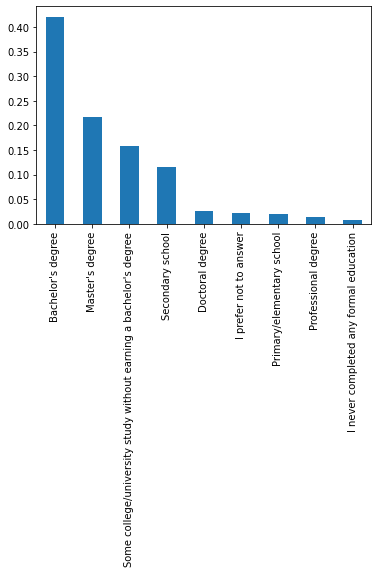

In [7]:
# Q1). Which top 3 formal education most of the responders have done?
Formaledu_stats=df1['FormalEducation'].value_counts()
(Formaledu_stats/df1.shape[0]).plot(kind='bar')
#plt.title("Formal Education")

In [8]:
Formaledu_stats=df1['FormalEducation'].value_counts()
Formaledu_stats

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

In [9]:
#List of all the coloumns with missing values
print(df1.columns[df1.isnull().any()].to_list()[:10])
print('Number of columns with missing values:',len(df1.columns[df1.isnull().any()].to_list()))

['MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType']
Number of columns with missing values: 147


In [10]:
# Q2). Which formal eduction has received highest average salary? 
# Is Professional degree holders are getting higher salary that Bachelor's degree holders?
b = df1[['FormalEducation','Salary']][df1.Salary.notnull()]
d =b.groupby('FormalEducation')['Salary'].mean().sort_values(ascending=False)
d

FormalEducation
Doctoral degree                                                      78527.933053
Primary/elementary school                                            62677.337356
Master's degree                                                      58250.838766
Bachelor's degree                                                    56914.358553
Some college/university study without earning a bachelor's degree    55912.810459
I never completed any formal education                               44430.660621
Secondary school                                                     40395.148419
Professional degree                                                  39503.658863
I prefer not to answer                                               38284.836141
Name: Salary, dtype: float64

In [11]:
b1 = df1[['FormalEducation','Salary']][df1.Salary.notnull()]
d1 =b1.groupby('FormalEducation')['Salary'].median().sort_values(ascending=False)
d1

FormalEducation
Doctoral degree                                                      64516.129032
Primary/elementary school                                            58064.516129
Bachelor's degree                                                    52500.000000
Master's degree                                                      50125.313283
Some college/university study without earning a bachelor's degree    48387.096774
I never completed any formal education                               37756.598240
I prefer not to answer                                               36559.139785
Secondary school                                                     34090.909091
Professional degree                                                  32258.064516
Name: Salary, dtype: float64

<AxesSubplot:xlabel='FormalEducation'>

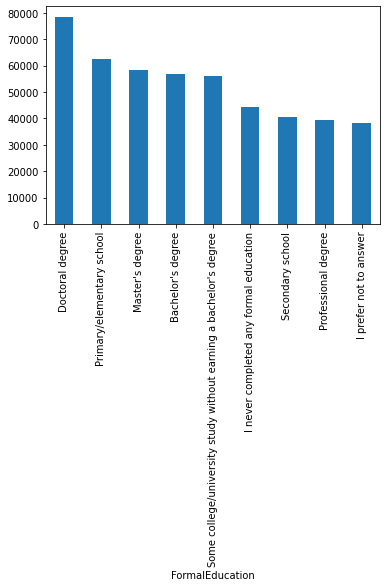

In [12]:
# bar Graph for avg salary received by formal education
d.plot(kind='bar')

<AxesSubplot:xlabel='FormalEducation'>

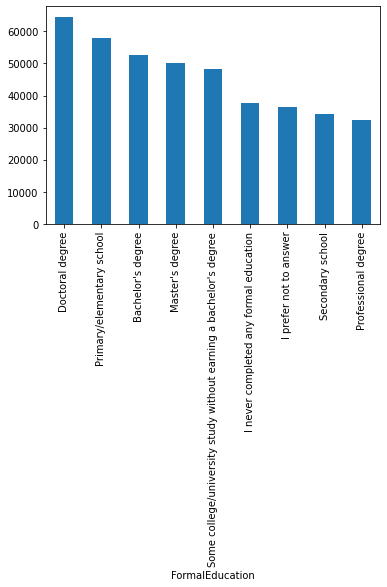

In [13]:
d1.plot(kind='bar')

In [14]:
# Participants from diffrent countries
Contry_part=df1['Country'].value_counts()
Contry_part

United States      11455
India               5197
United Kingdom      4395
Germany             4143
Canada              2233
                   ...  
Pitcairn Island        1
French Guyana          1
Gabon                  1
Monaco                 1
Saint Helena           1
Name: Country, Length: 201, dtype: int64

<AxesSubplot:>

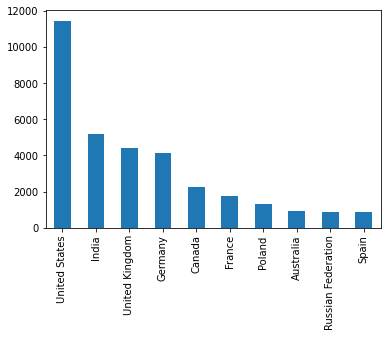

In [15]:
Contry_part[0:10].plot(kind='bar')

In [16]:
# Q3). Which type of company gives highest average salary?
CompTyp_sal = df1[['CompanyType','Salary']][df1.Salary.notnull()]
CompTyp_avg =CompTyp_sal.groupby('CompanyType')['Salary'].mean().sort_values(ascending=False)
CompTyp_avg

CompanyType
Publicly-traded corporation                                              79168.748281
Venture-funded startup                                                   72827.046176
Non-profit/non-governmental organization or private school/university    61448.325391
Something else                                                           58631.065764
Government agency or public school/university                            53860.161060
Privately-held limited company, not in startup mode                      50325.502932
Pre-series A startup                                                     48912.831142
Sole proprietorship or partnership, not in startup mode                  45439.387981
I prefer not to answer                                                   43725.020919
I don't know                                                             42887.701707
State-owned company                                                      31033.753609
Name: Salary, dtype: float64

<AxesSubplot:xlabel='CompanyType'>

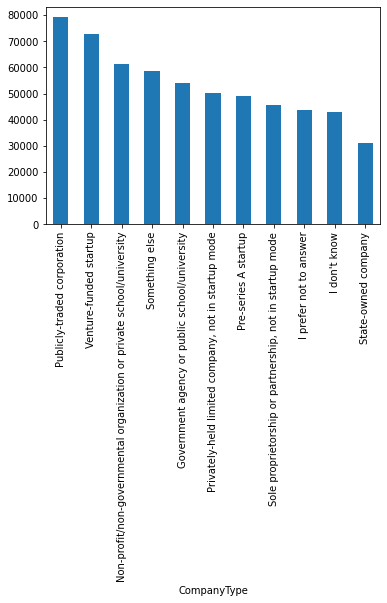

In [17]:
CompTyp_avg.plot(kind='bar')